## Overall variance

Words with the highest overall variance in the smoothed time series data. Captures words that dramatically increase, decrease, spike, or fluctuate:

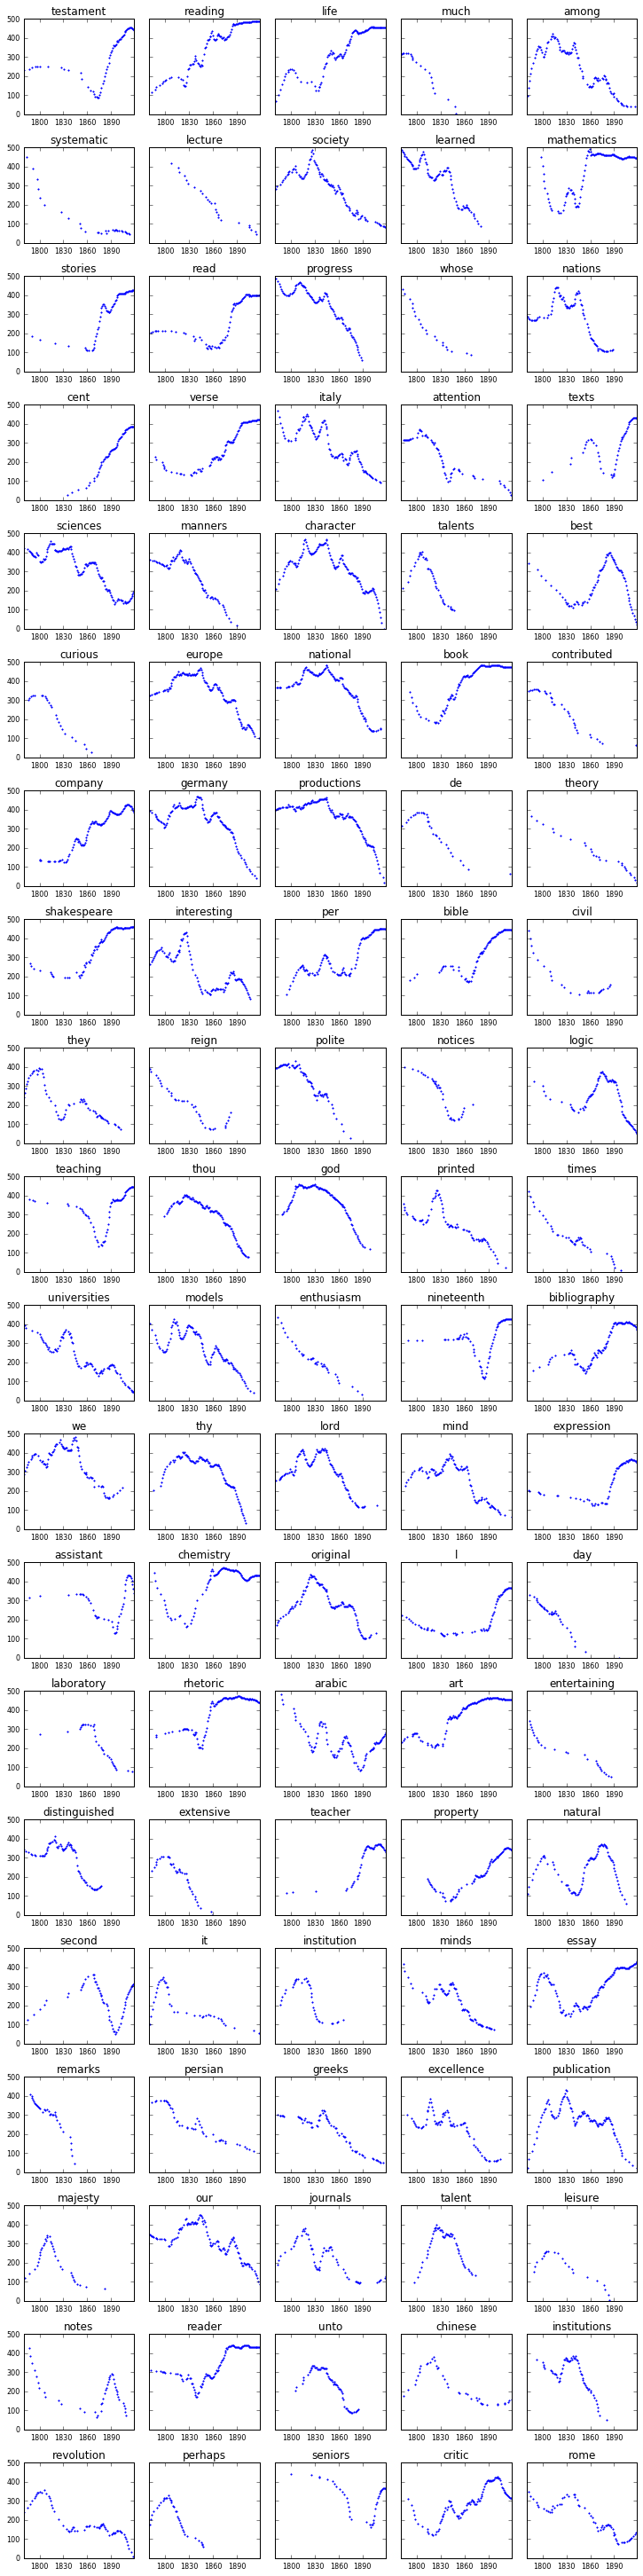

In [10]:
import numpy as np

from hol.topn_series import TopnSeries

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

years = range(1780, 1920)
depth = 500

topns = TopnSeries(years, depth, level1=5)

def print_query(_lambda, rows=20, cols=5, figsize=(10, 40)):
    
    result = topns.sort(_lambda)
    topn = list(result.items())[:100]
    
    y1 = list(years)[0]
    y2 = list(years)[-1]
    
    fig, axarr = plt.subplots(rows, cols, figsize=figsize, sharey='row')
    fig.tight_layout(pad=0, h_pad=2, w_pad=0.1)
    
    for i, row in enumerate(axarr):
        for j, ax in enumerate(row):

            t, (s, v) = topn[(i*5)+j]
            
            ax.set_title(t)
            ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
            ax.tick_params(labelsize=8)
            ax.set_xlim(y1, y2)
            ax.set_ylim(0, depth)
            
            ax.plot(
                *zip(*s.items()),
                linestyle='none',
                marker=".",
                markersize=3,
            )

def score(s):
    return np.var(list(s.values()))

print_query(score)

## Trending up

Words that show the largest overall increase in rank over time:

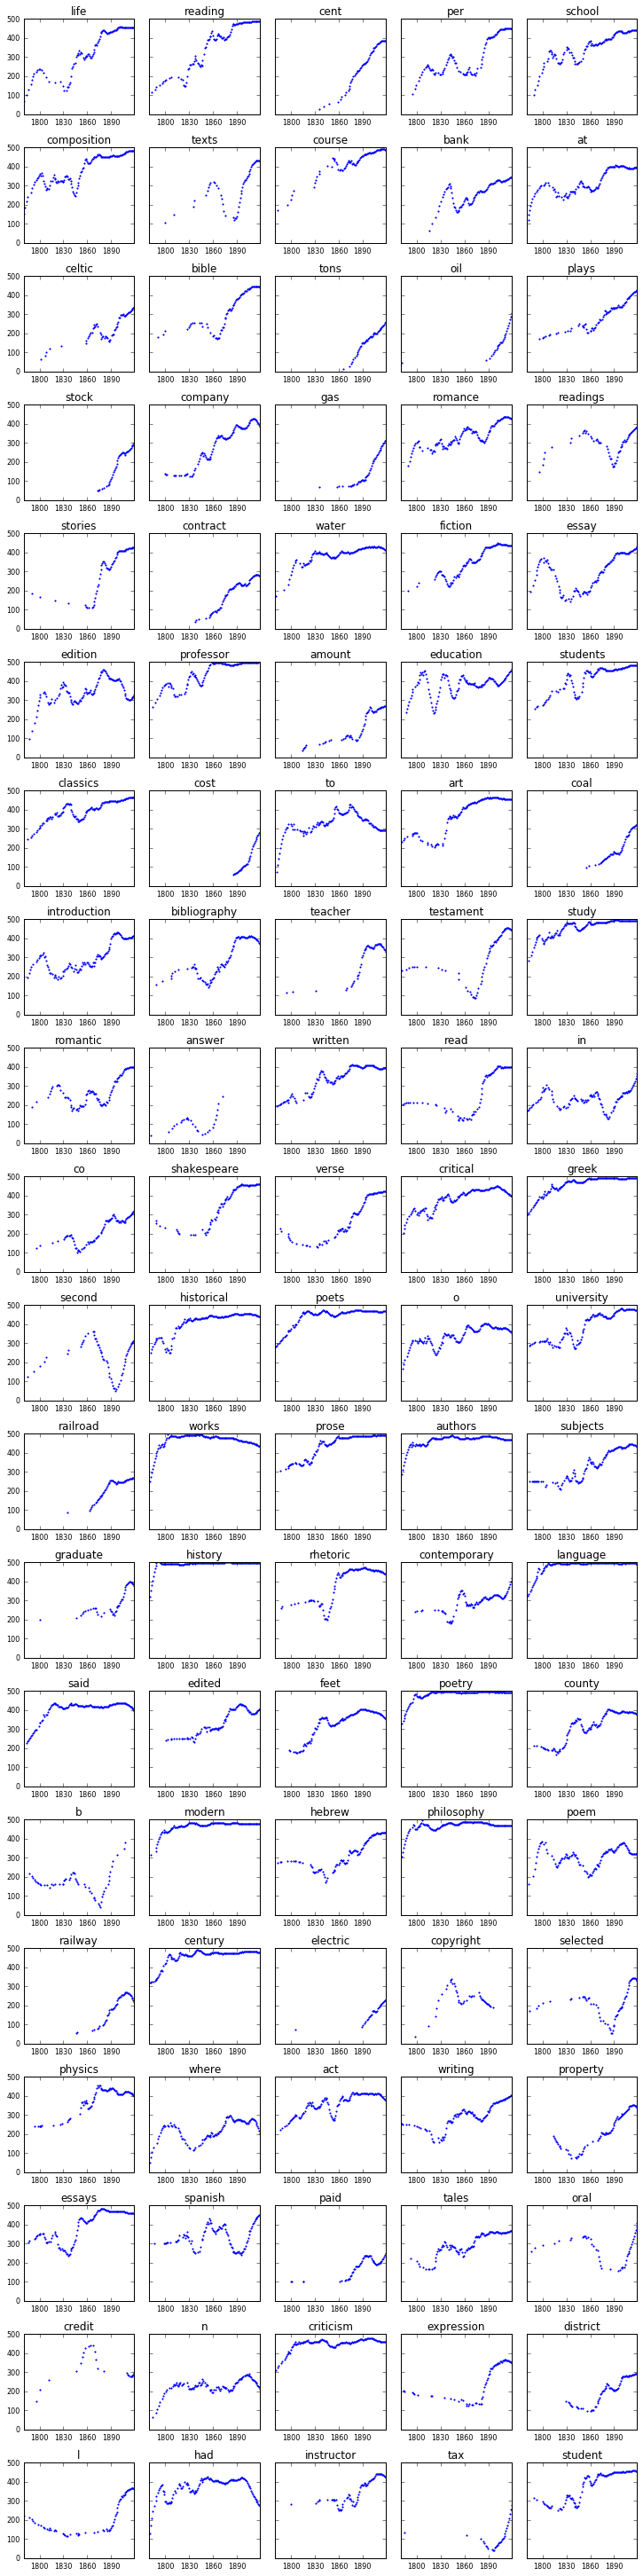

In [11]:
def score(s):
    y = list(s.values())
    return y[-1] - y[0]

print_query(score)

## Trending down

Words that show the largest overall decrease in rank over time:

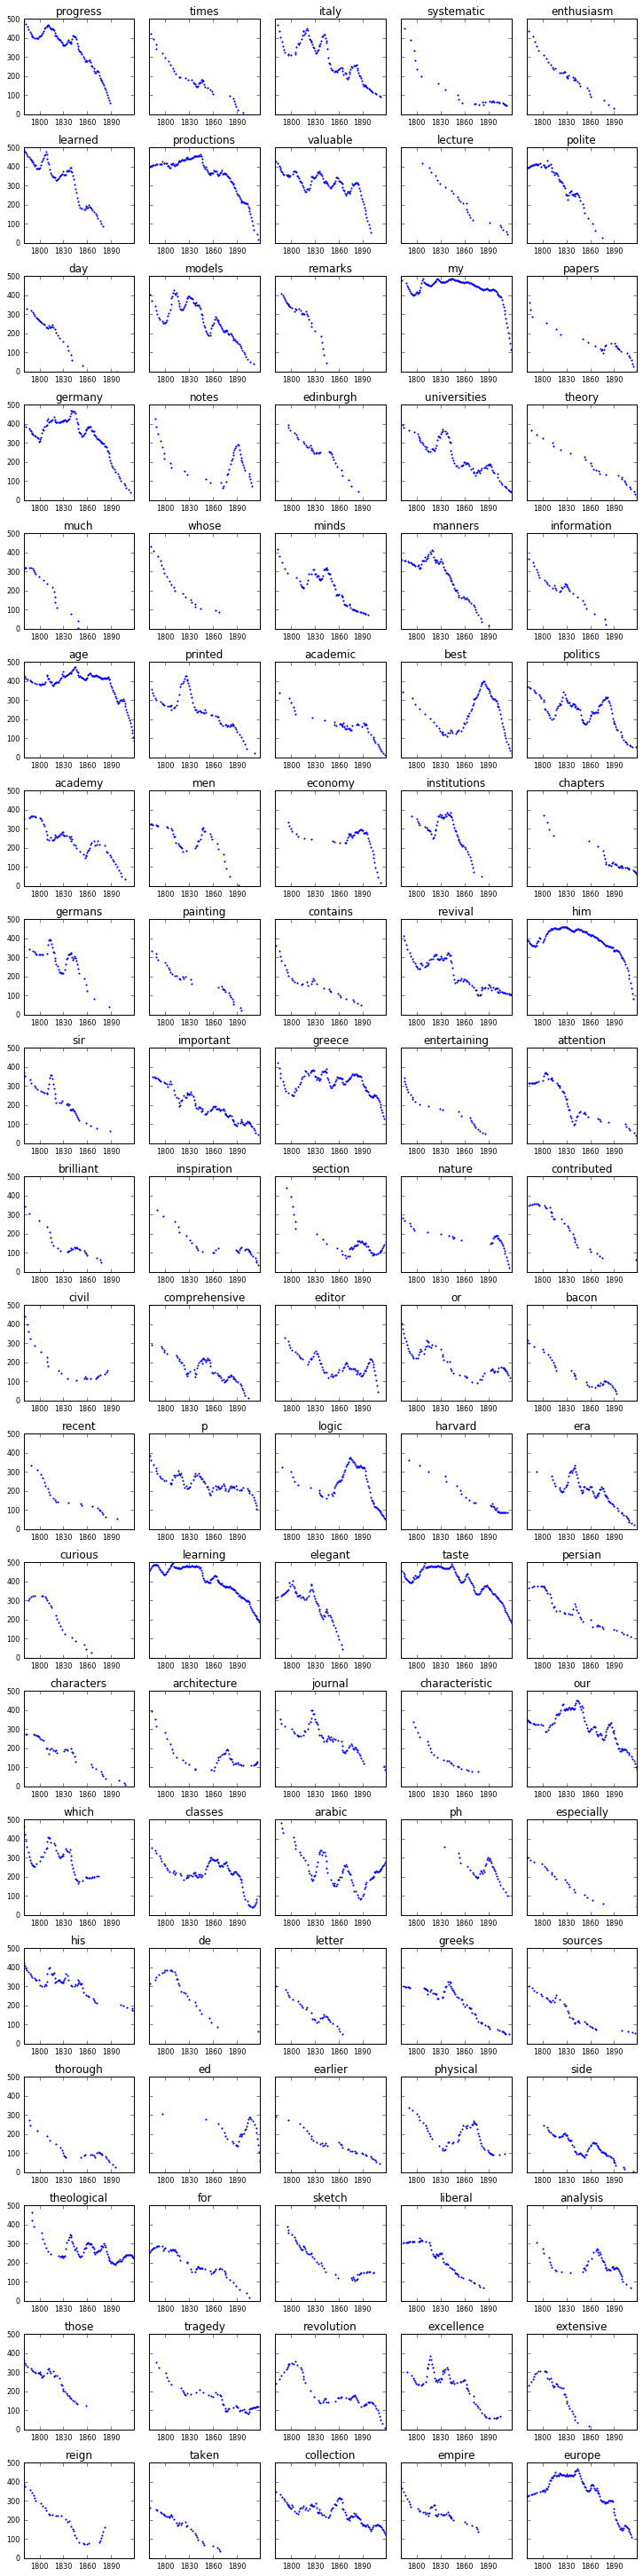

In [12]:
def score(s):
    y = list(s.values())
    return y[0] - y[-1]

print_query(score)

## Constant

Words that stay in the same place in the rankings over time:

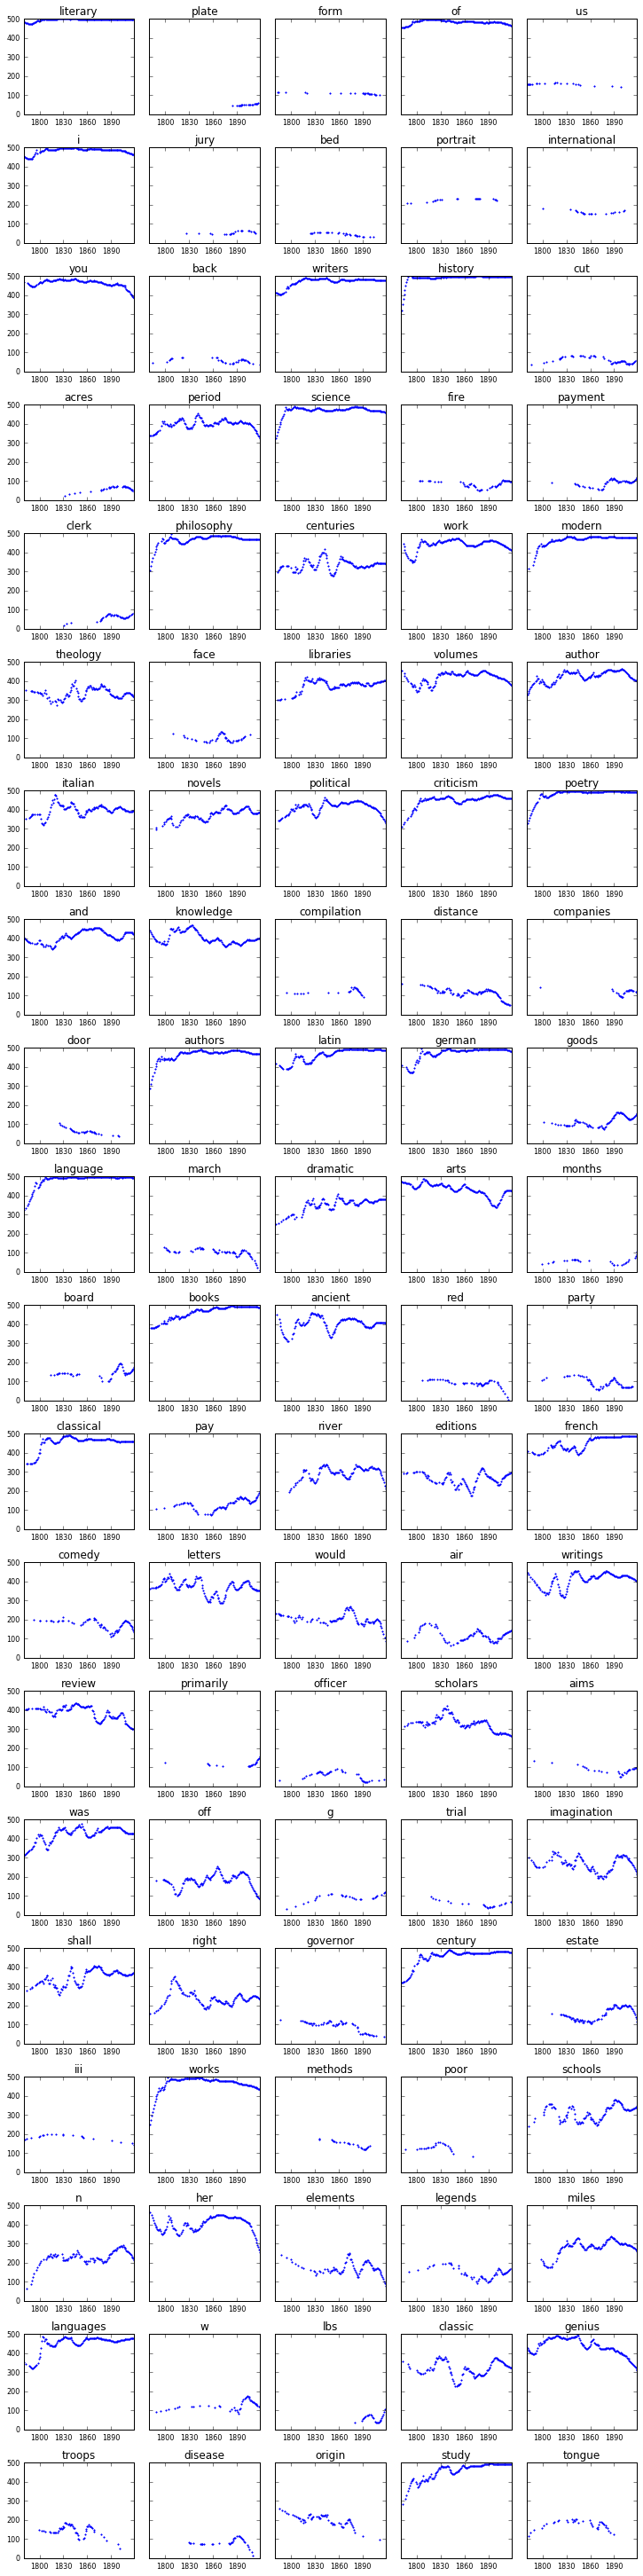

In [19]:
def score(s):
    return (
        -np.var(list(s.values())) *
        (len(years) / len(s))
    )

print_query(score)

## Over all rate of change in MDWs

- Slide a 20-year window across the year range;
- In each window, compute the average edit distance for all pairs of MDW lists;
- Anchor this value to the center of the window.

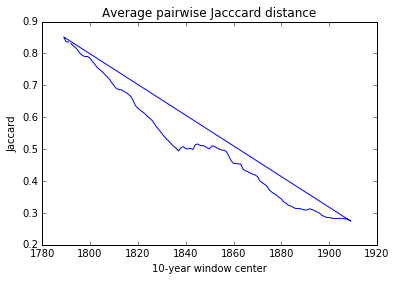

In [16]:
import math

from distance import jaccard
from itertools import combinations

from hol.utils import window

avg_window_dist = {}
for w in window(range(1780, 1920), 20):
    
    ds = []
    for y1, y2 in combinations(w, 2):
        y1_tn = list(topns.topns[y1].keys())
        y2_tn = list(topns.topns[y2].keys())
        ds.append(jaccard(y1_tn, y2_tn))
        
    center = math.floor((w[0] + w[-1])/2)
    
    avg_window_dist[center] = sum(ds) / len(ds)
    
plt.title('Average pairwise Jacccard distance')
plt.xlabel('10-year window center')
plt.ylabel('Jaccard')
plt.plot(*zip(*avg_window_dist.items()))

## Time series -> density functions

Convert the rank time series into PDFs:

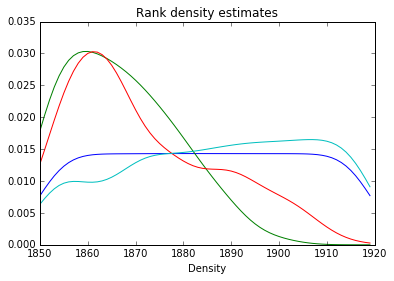

In [6]:
def plot_pdfs(tokens, years):
    for t in tokens:
        
        pdf = topns.rank_pdf(t, bandwidth=5)
        samples = [np.exp(pdf.score(y)) for y in years]
        
        plt.plot(years, samples, label=t)
        plt.title('Rank density estimates')
        plt.xlabel('Year')
        plt.xlabel('Density')
        # plt.legend(loc='upper right')
        
    plt.show()
    
plot_pdfs(
    ['history', 'god', 'mind', 'course'],
    range(1850, 1920),
)

['left', 'down', 'minds', 'captain', 'governor', 'unto', 'standard', 'senate', 'side', 'forms', 'saw', 'foreign', 'victorian', 'we', 'journal', 'vessel', 'came', 'problems', 'drawing', 'physical', 'illustrations', 'about', 'ye', 'progress', 'die', 'lord', 'mind', 'higher', 'london', 'year', 'cut', 'ground', 'society', 'be', 'complete', 'comprehensive', 'among', 'fire', 'monthly', 'w', 'could', 'more', 'face', 'merit', 'era', 'vessels', 'red', 'go', 'economics', 'party', 'did', 'creative', 'france', 'thee', 'academic', 'research', 'white', 'night', 'seniors', 'russian', 'revolution', 'second', 'important', 'against', 'et', 'analysis', 'graduates', 'god', 'que', 'biology', 'degree', 'narrative', 'bachelor', 'oral', 'characteristics', 'revival', 'architecture', 'is', 'head', 'tragedy', 'models', 'mental', 'universities', 'am', 'italy', 'historian', 'money', 'cloth', 'wife', 'candidates', 'christianity', 'special', 'middle', 'sociology', 'original', 'made', 'natural', 'advanced', 'p', 'val

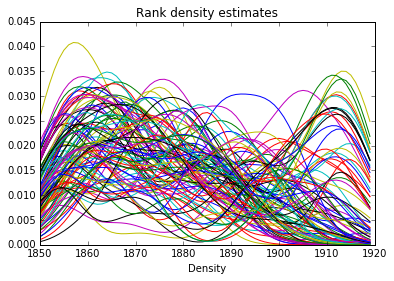

['notes', 'red', 'bachelor', 'down', 'among', 'revolution', 'academic', 'be', 'cut', 'board', 'drawing', 'references', 'journal', 'is', 'x', 'face', 'left', 'pp', 'die', 'physical', 'ph', 'architecture', 'list', 'rome', 'ed', 'sense', 'head', 'chapters', 'operation', 'cloth', 'illustrations', 'acres', 'payment', 'london', 'party', 'lyrics', 'complete', 'editor', 'ideals', 'vessel', 'clerk', 'pupils', 'section', 'era', 'merit', 'we', 'italy', 'scott', 'que', 'r', 'total', 'mental', 'small', 'progress', 'subject', 'universities', 'w', 'side', 'monthly', 'tragedy', 'pounds', 'ground', 'interesting', 'week', 'comprehensive', 'stock', 'thought', 'higher', 'money', 'historian', 'et', 'examination', 'politics', 'story', 'economy', 'training', 'artistic', 'series', 'teacher', 'action', 'unto', 'characteristics', 'associate', 'manual', 'march', 'lessons', 'wife', 'aim', 'natural', 'july', 'e', 'minds', 'foreign', 'christianity', 'amount', 'bonds', 'victorian', 'revival', 'do', 'wrote']


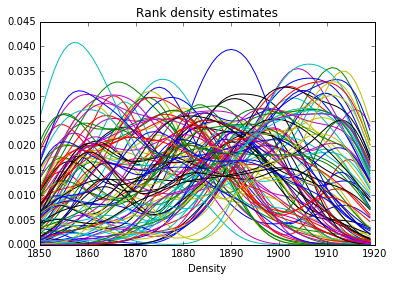

['tax', 'references', 'pressure', 'cost', 'sense', 'victorian', 'r', 'w', 'ed', 'operation', 'middle', 'bachelor', 'list', 'que', 'acres', 'narrative', 'provisions', 'x', 'gas', 'down', 'e', 'candidates', 'stock', 'small', 'ideals', 'board', 'associate', 'revolution', 'seniors', 'america', 'examination', 'subject', 'pupils', 'graduates', 'fire', 'russian', 'over', 'lyrics', 'architecture', 'oral', 'left', 'tons', 'clerk', 'is', 'june', 'assistant', 'l', 'sociology', 'railway', 'economics', 'biology', 'advanced', 'bonds', 'forms', 'coal', 'degree', 'amount', 'text', 'selected', 'total', 'pounds', 'tragedy', 'aim', 'teacher', 'appreciation', 'training', 'texts', 'graduate', 'ground', 'linguistic', 'line', 'special', 'pp', 'legends', 'artistic', 'story', 'scott', 'cent', 'editor', 'creative', 'testament', 'q', 'teachers', 'march', 'chapters', 'head', 'et', 'week', 'characteristics', 'expression', 'payment', 'temperature', 'july', 'celtic', 'land', 'revival', 'city', 'face', 'cut', 'renais

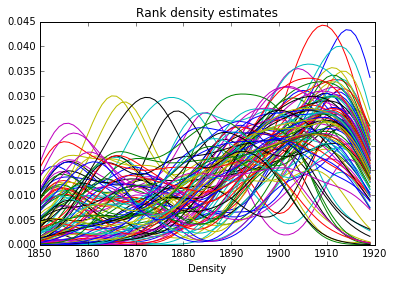

In [7]:
from collections import OrderedDict

from hol.utils import sort_dict

def rank_by_density(years):
    
    result = OrderedDict()
    
    for t in topns.tokens():
        
        count = 0
        for year, ranks in topns.topns.items():
            if t in ranks:
                count += 1
                
        if count > 30:
            
            try:
                pdf = topns.rank_pdf(t)
                vals = [np.exp(pdf.score(y)) for y in years]
                result[t] = max(vals)

            except:
                pass
    
    return sort_dict(result)

ranks = rank_by_density(range(1850, 1875))
print(list(ranks.keys())[:100])
plot_pdfs(list(ranks.keys())[:100], range(1850, 1920))

ranks = rank_by_density(range(1875, 1900))
print(list(ranks.keys())[:100])
plot_pdfs(list(ranks.keys())[:100], range(1850, 1920))

ranks = rank_by_density(range(1900, 1925))
print(list(ranks.keys())[:100])
plot_pdfs(list(ranks.keys())[:100], range(1850, 1920))